# Training Draft

#### Xiao Xin

In [1]:
import numpy as np
import tensorflow as tf

from math import sqrt
import matplotlib.pyplot as plt
from db.driver import Driver

%matplotlib inline

In [2]:
driver = Driver()
DIMENSION = 256

In [3]:
def perpendicular_distance(point, start, end):
    x, y = (v - n for v, n in zip(point, start))
    b, a = (v - n for v, n in zip(end, start))
    return abs(a * x - b * y) / sqrt(a * a + b * b)

# Ramer-Douglas-Peucker Line Simplification
def RDP(curve_list, epsilon=2.0):
    def single(curve):
        curve = zip(*curve)
        def helper(i, j):
            pivot = max_distance = 0
            start, end = curve[i], curve[j - 1]
            for x in xrange(i, j):
                p = curve[x]
                d = perpendicular_distance(p, start, end)
                if d > max_distance:
                    pivot, max_distance = x, d
            if max_distance <= epsilon:
                return [start, end]
            result = helper(i, pivot + 1)
            result.extend(helper(pivot, j)[1:])
            return result
        return zip(*helper(0, len(curve)))
    return [single(curve) for curve in curve_list]

In [4]:
def generate_image_matrix(obj):
    image = np.zeros((DIMENSION, DIMENSION))
    for stroke in obj['drawing']:
        for x, y in zip(*stroke):
            image[y][x] = 1
    return image

def display_image_matrix(obj):
    plt.axis('off')
    plt.imshow(generate_image_matrix(obj), cmap='Greys')
    plt.show()

def draw_from_strokes(obj):
    plt.axis('off')
    plt.gca().invert_yaxis()
    for stroke in obj['drawing']:
        plt.plot(*stroke, color='black')
    plt.show()

In [5]:
def decode_input(line):
    result = []
    for stroke in line.split('-'):
        result.append([[], []])
        if stroke:
            for i, coordinate in enumerate(stroke.split('|')):
                result[-1][i & 1].append(int(coordinate))
    return result

In [6]:
def normalize(strokes):
    strokes = strokes[:]
    x_low = y_low   = 256
    x_high = y_high = 0
    
    # Find boundaries
    for stroke in strokes:
        x, y = stroke
        x_low = min(x_low, min(x))
        x_high = max(x_high, max(x))
        y_low = min(y_low, min(y))
        y_high = max(y_high, max(y))
    current_dimension = 1 + max(x_high - x_low, 
                                y_high - y_low)
    
    # Align to upper-left, and stretch to dimension
    for stroke in strokes:
        x, y = stroke
        x[:] = [(v - x_low) * DIMENSION / current_dimension for v in x]
        y[:] = [(v - y_low) * DIMENSION / current_dimension for v in y]
    return strokes

In [7]:
input_strokes = []
with open('./data/strokes.txt', 'r') as doc:
    for line in doc:
        line = line.strip()
        input_strokes.append(decode_input(line))

In [8]:
raw = input_strokes[13]
normalized = normalize(raw)

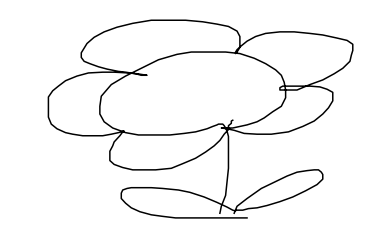

In [9]:
draw_from_strokes({ 'drawing': normalized })

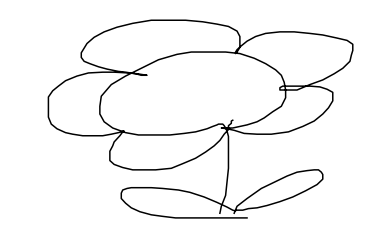

In [10]:
draw_from_strokes({ 'drawing': raw })

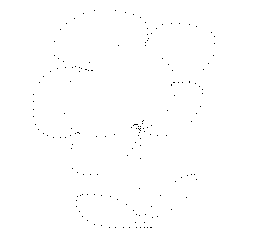

In [11]:
display_image_matrix({ 'drawing': normalized })

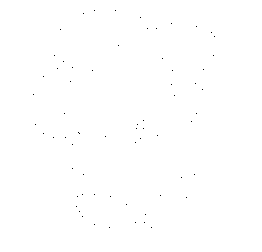

In [12]:
display_image_matrix({ 'drawing': RDP(normalized) })